# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

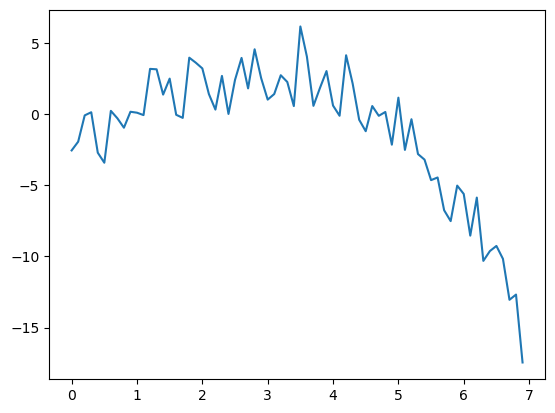

In [5]:
import matplotlib.pyplot as plt
# Your code for scatterplot here

plt.plot(xy_data[:,0],xy_data[:,1])

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [127]:
def polyreg(data, k):
    M = np.zeros((len(data), k+1))
    F = np.zeros(len(data))
    R = np.zeros(len(data))
    for i in range(len(M)):
        M[i] = [(data[i][0])**j for j in range(k+1)]
    Y = np.array(data).T[1]
    beta =np.linalg.lstsq(M, Y, rcond=None)[0]
    for i in range(len(M)):
        F[i] = np.dot([beta[j] for j in range(k+1)],[(data[i][0])**j for j in range(k+1)])
    R = Y - F
    return [list(beta), list(F), list(R)]

Use the tests below to check the outputs of the function you have written:

In [130]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape
beta_test = polyreg(test_matrix, k=2)[0]
print(beta_test)
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

[1.9999999999999918, -6.999999999999998, 3.000000000000018]


### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

SSE for k=2 is: 172.18102528988544
SSE for k=3 is: 152.4058048891581
SSE for k=4 is: 151.22778969027112
R2 for k=2 is: 0.11237022250817763
R2 for k=3 is: 0.09946435257949786
R2 for k=4 is: 0.09869554643611429


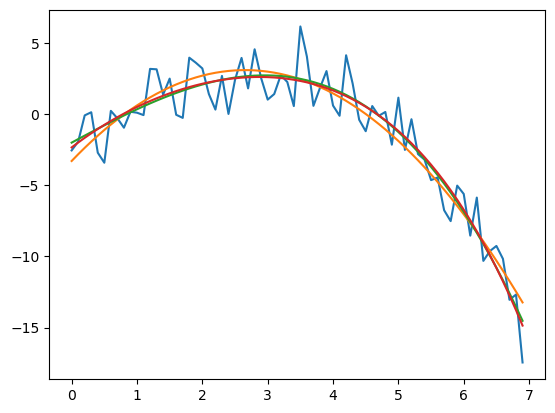

In [139]:
#Your code here
def find_sse(R):
    s = 0
    for i in R:
        s += i**2
    return s

#find SSE=0
fit0 = polyreg(xy_data, 0)
fit2 = polyreg(xy_data, 2)
fit3 = polyreg(xy_data, 3)
fit4 = polyreg(xy_data, 4)

sse0 = find_sse(fit0[2])
sse2 = find_sse(fit2[2])
sse3 = find_sse(fit3[2])
sse4 = find_sse(fit4[2])

print("SSE for k=2 is:", sse2)
print("SSE for k=3 is:", sse3)
print("SSE for k=4 is:", sse4)

print("R2 for k=2 is:", sse2/sse0)
print("R2 for k=3 is:", sse3/sse0)
print("R2 for k=4 is:", sse4/sse0)

plt.plot(xy_data[:,0],xy_data[:,1])
plt.plot(xy_data[:,0],fit2[1])
plt.plot(xy_data[:,0],fit3[1])
plt.plot(xy_data[:,0],fit4[1])


 #### State which model you choose and briefly justify your choice.
 
 
 < fill in your answer in this cell.>
 
 I would choose k=3 since R2 barely improves going from 3 to 4, and I would be weary of overfitting my model to the data by using a higher k. R2 does improve noticibly from k=2 to k=3 however, so I would use k=3 instead of k=2.

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

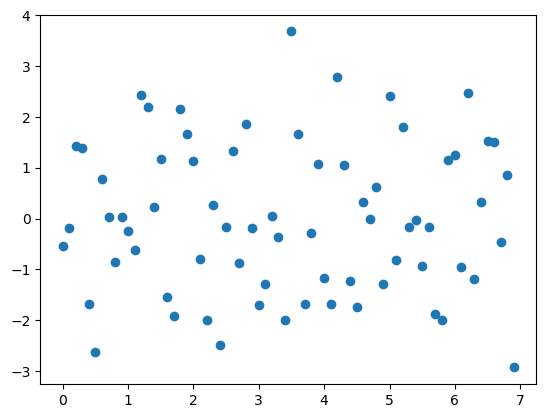

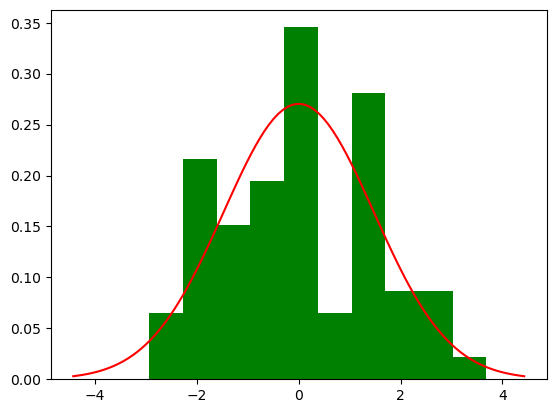

In [153]:
#Your code here
from scipy.stats import norm

plt.scatter(xy_data[:,0],fit3[2])
plt.figure()
n, bins, patches = plt.hist(fit3[2], bins=10, density=True, facecolor='green');


res_stdev = np.std(fit3[2])  #standard deviation of residuals
xvals = np.linspace(-3*res_stdev,3*res_stdev,100)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
plt.show()